In [1]:
%matplotlib inline
#
from LRGSG_package.shared import *
from LRGSG_package.config.const import *
from LRGSG_package.LRGSG import move_to_rootf, Lattice2D
#
move_to_rootf(print_tf=True)
plt.style.use("ipynb/nb_plotsheet.mplstyle")

cwd: /home/opisthofulax/PhD/projects/complex-networks/LRG-Signed


In [2]:
sides = [8, 16, 32, 48, 64, 96, 128]
datpath = "phase_transition_l2d/"
geometry_cell_dict = {'squared': L2D_RAND_CELL_LIST,
                    'triangular': L2D_RAND_CELL_LIST,
                    'hexagonal': L2D_RAND_CELL_LIST}

In [3]:
def read_files_to_2d_array(folder_path, keyword):
    """
    Read files from a folder that contain a specific keyword in their name.
    Each file's contents are appended to a 2D array.
    
    Args:
    - folder_path: Path to the folder containing the files.
    - keyword: String that must be part of the file's name to be processed.
    
    Returns:
    - A 2D list containing the contents of each processed file.
    """
    # Initialize the 2D array
    data_2d_array = []
    
    # List all files in the given folder
    for file_name in os.listdir(folder_path):
        # Check if the file name contains the keyword
        if keyword in file_name.split('_'):
            # Construct full file path
            file_path = os.path.join(folder_path, file_name)
            # Open and read the file
            with open(file_path, 'r') as file:
                # Assuming each line of a file represents a separate data entry
                file_contents = [line.strip() for line in file.readlines()]
                data_2d_array.append(file_contents)
    
    return data_2d_array

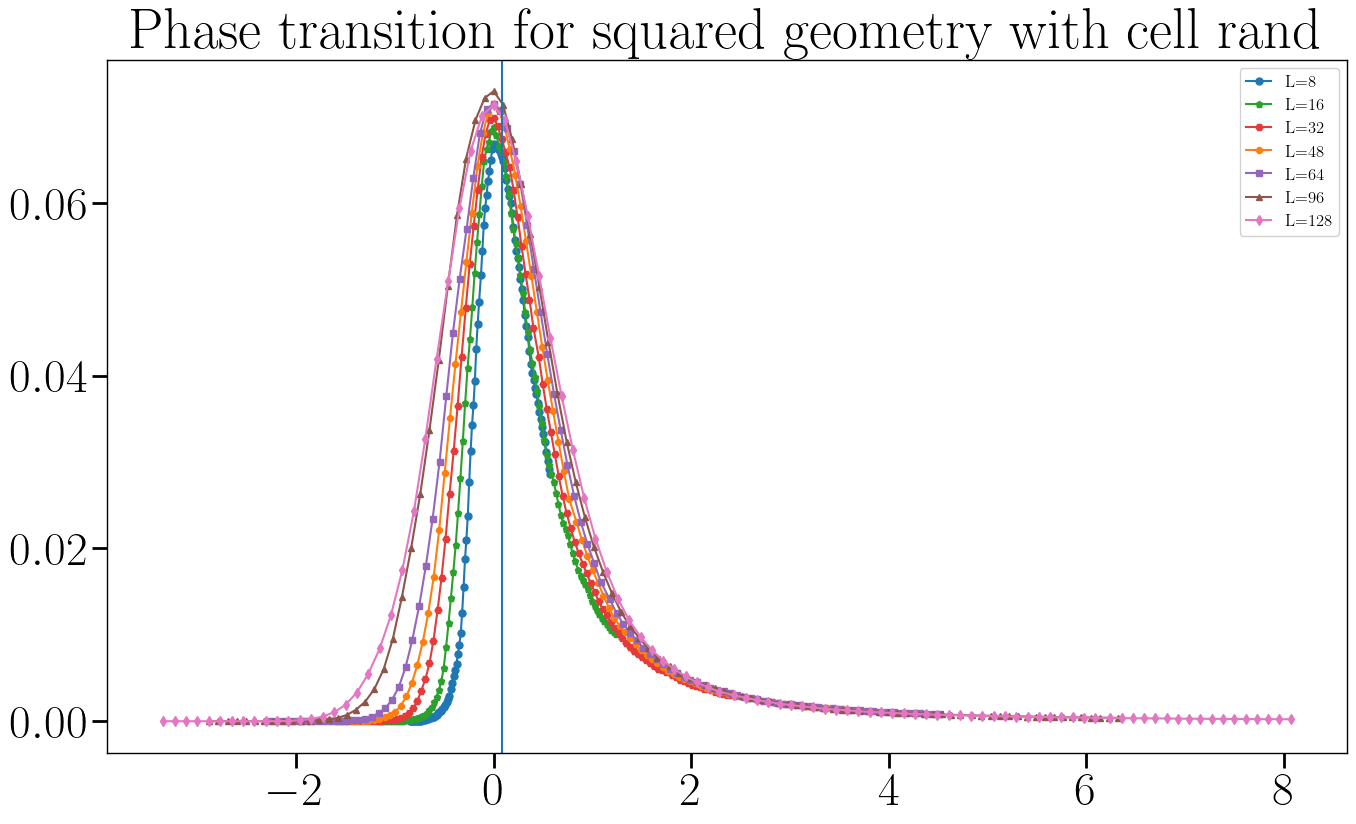

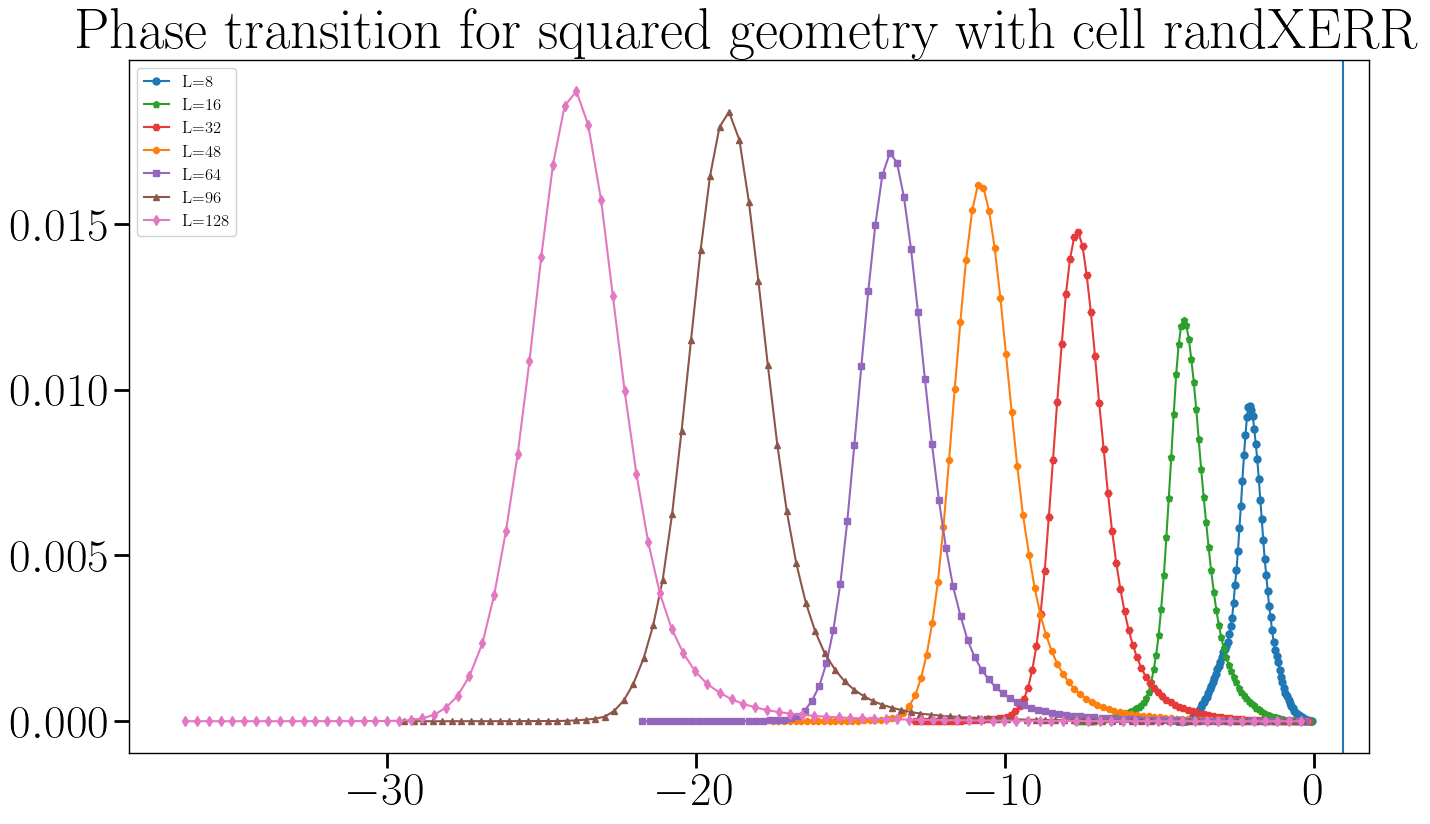

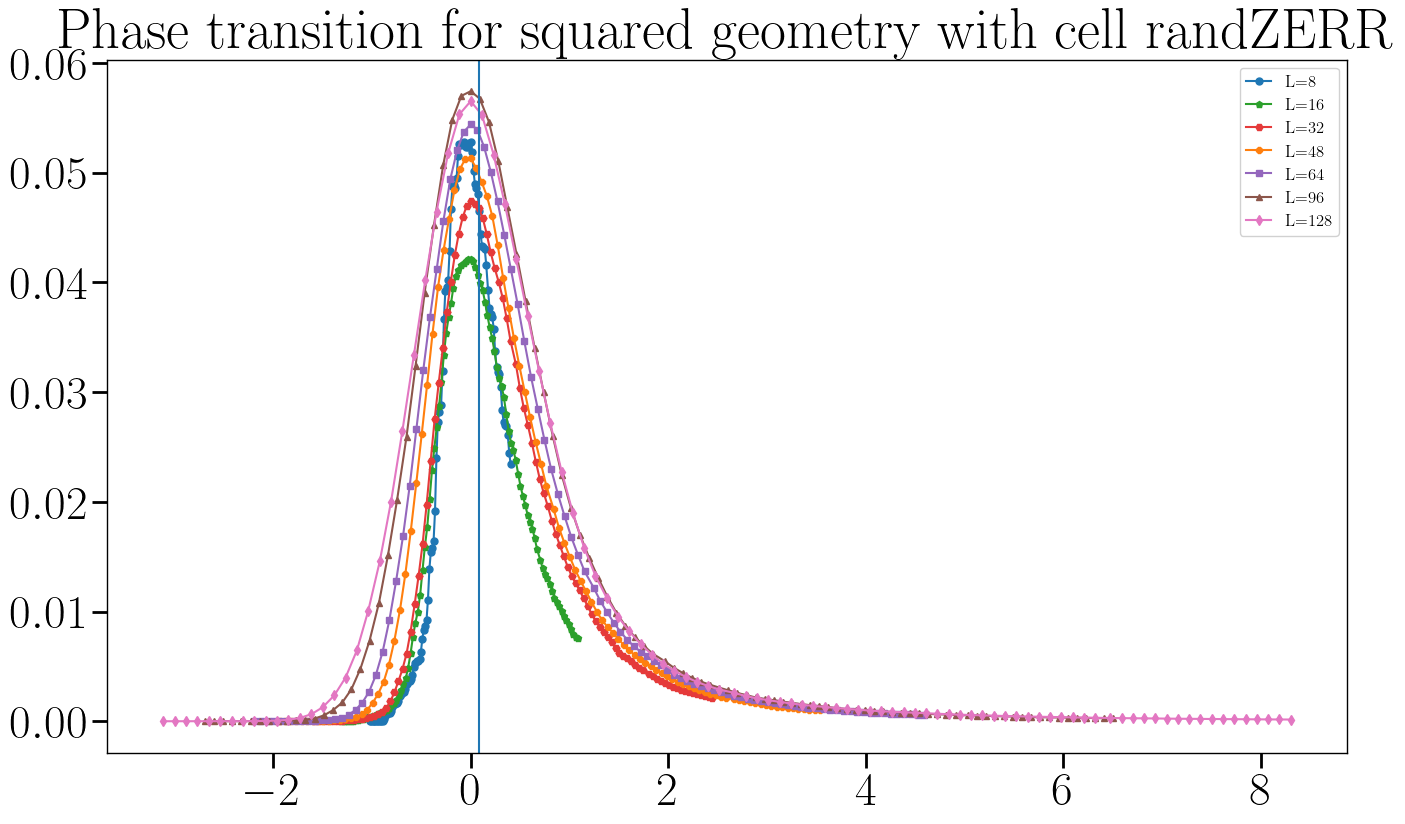

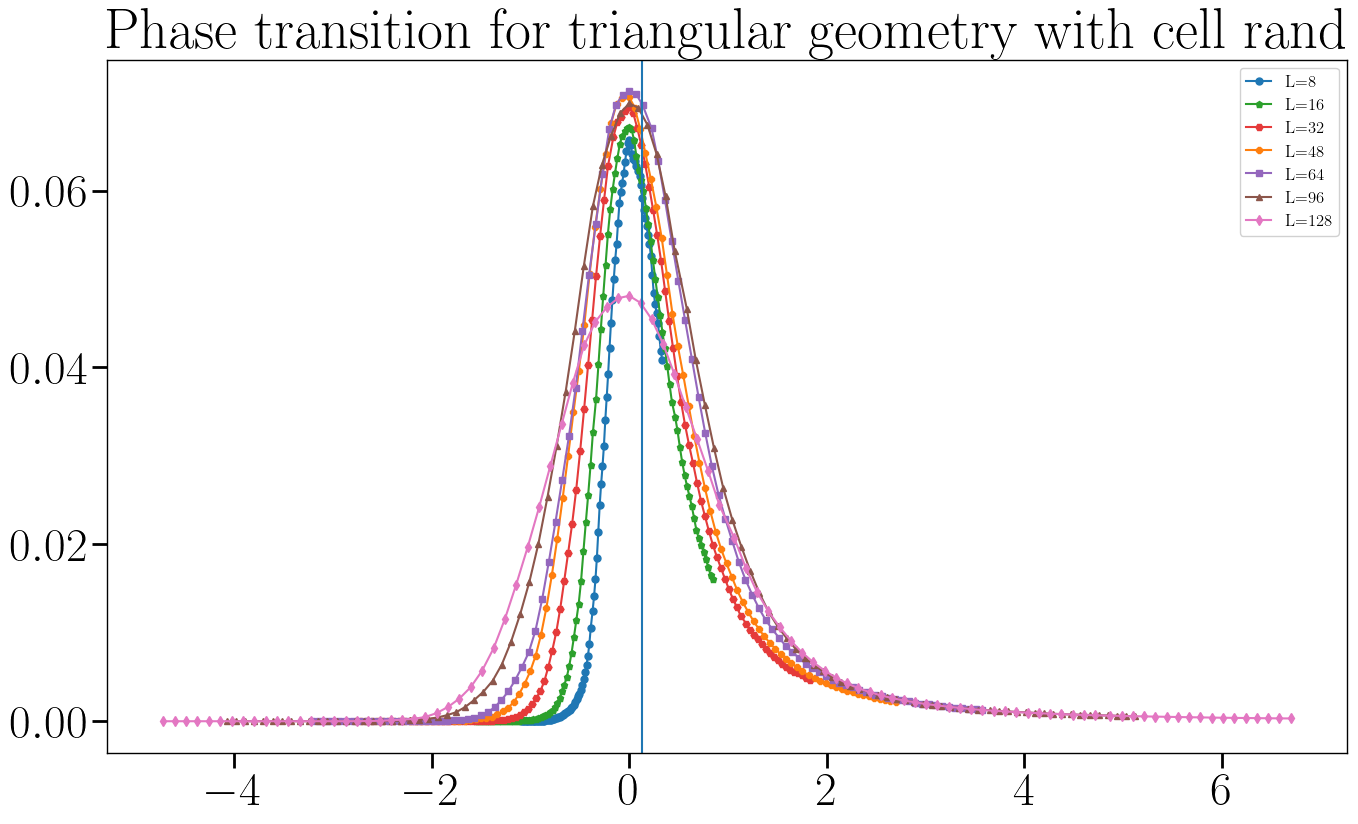

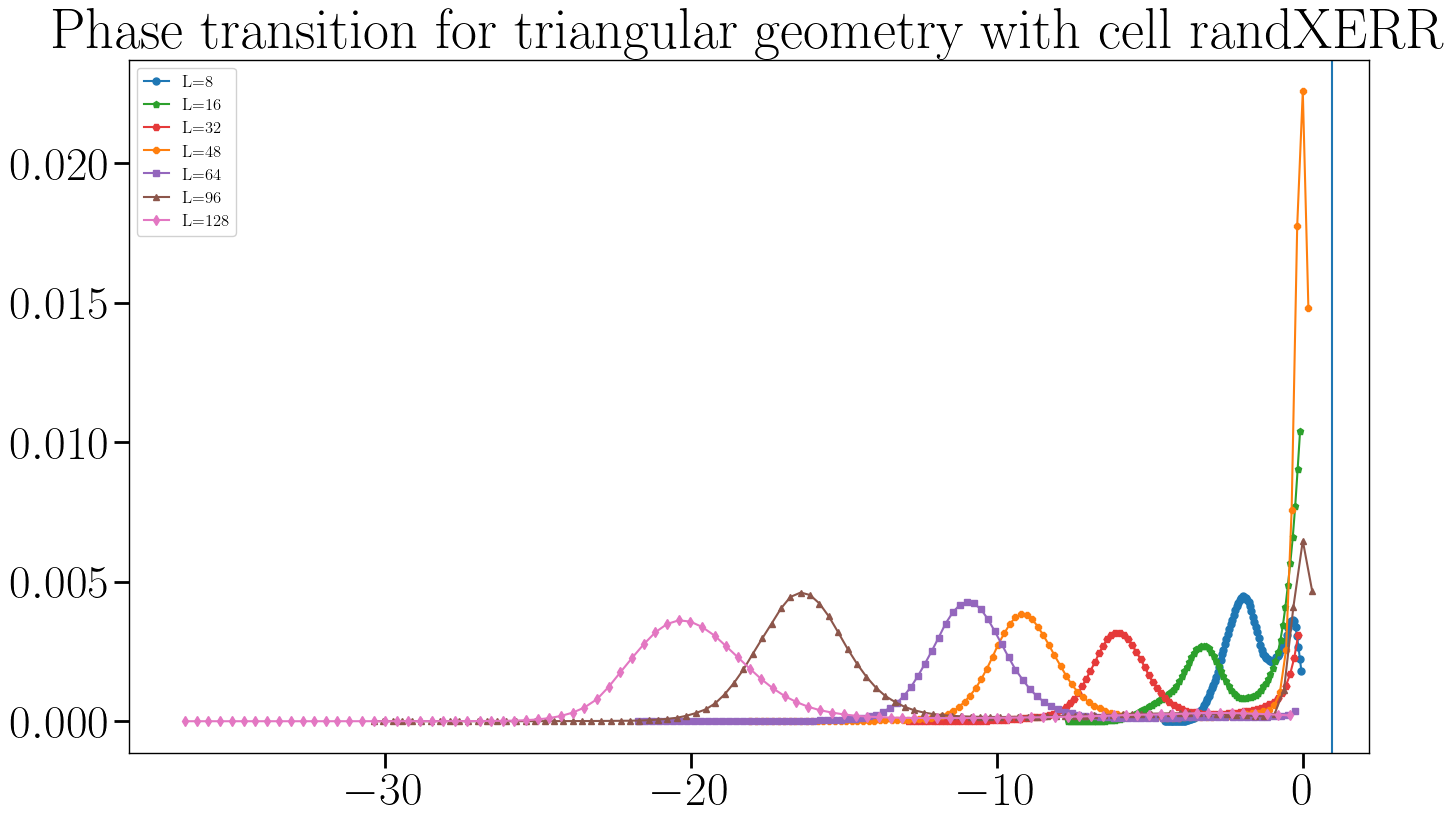

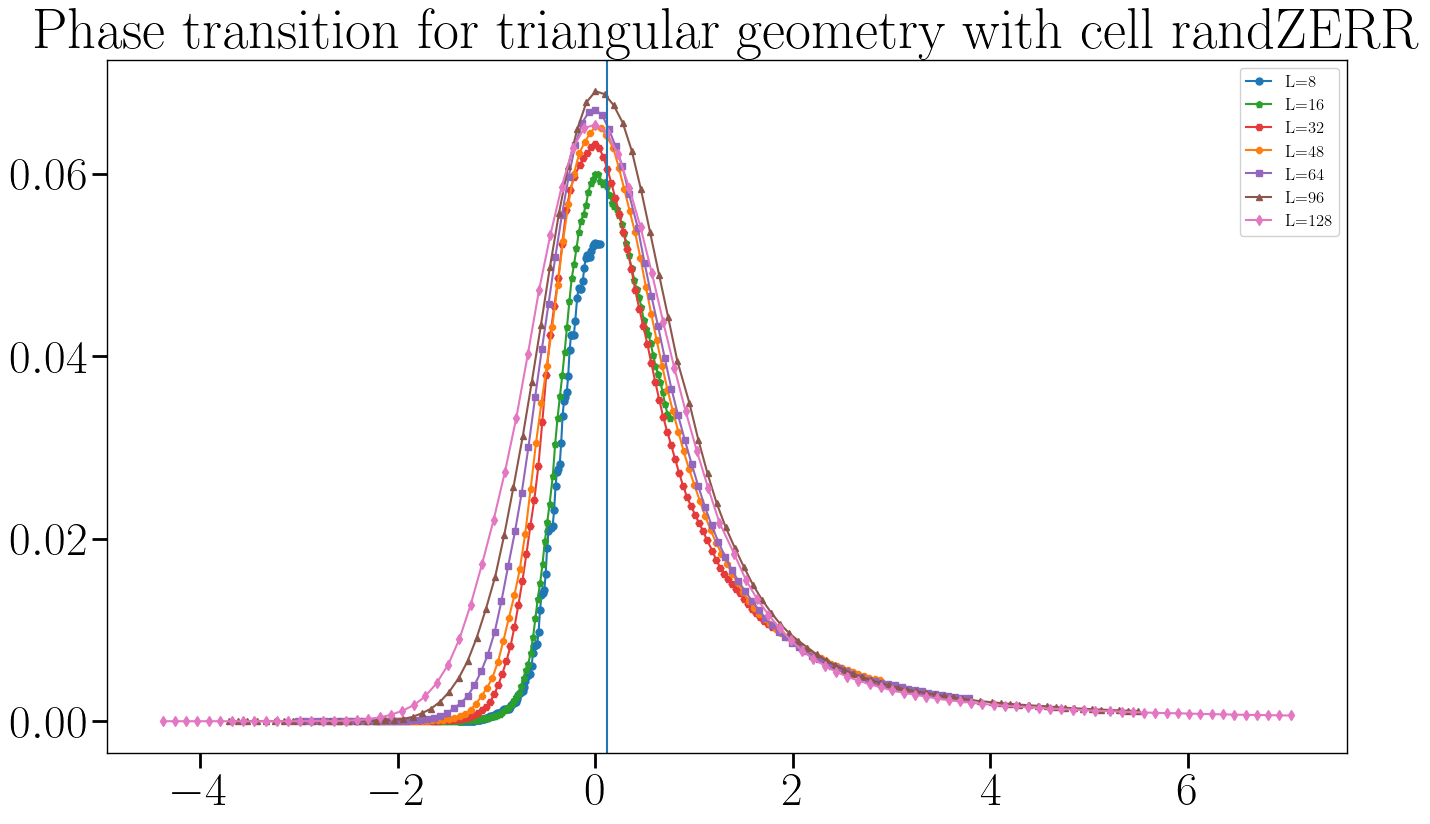

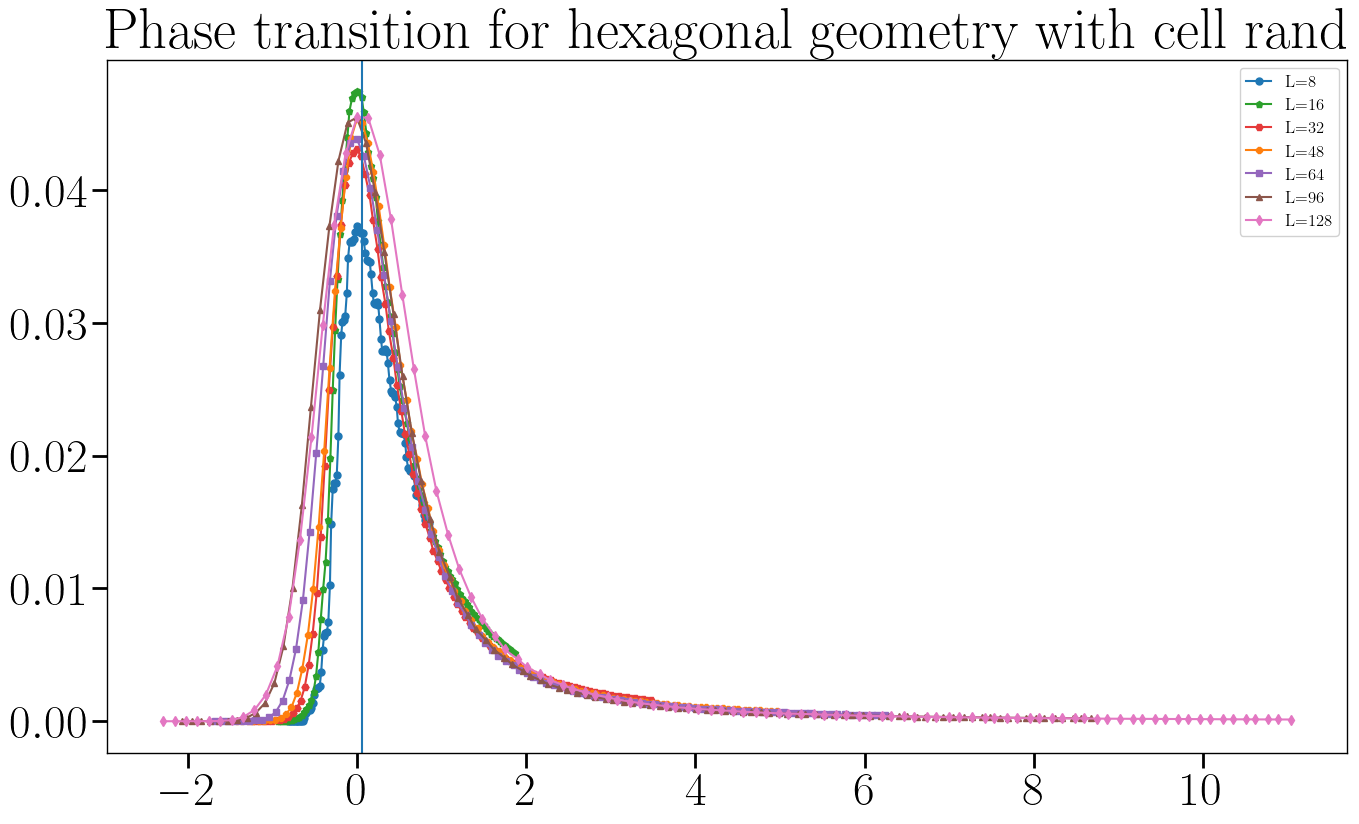

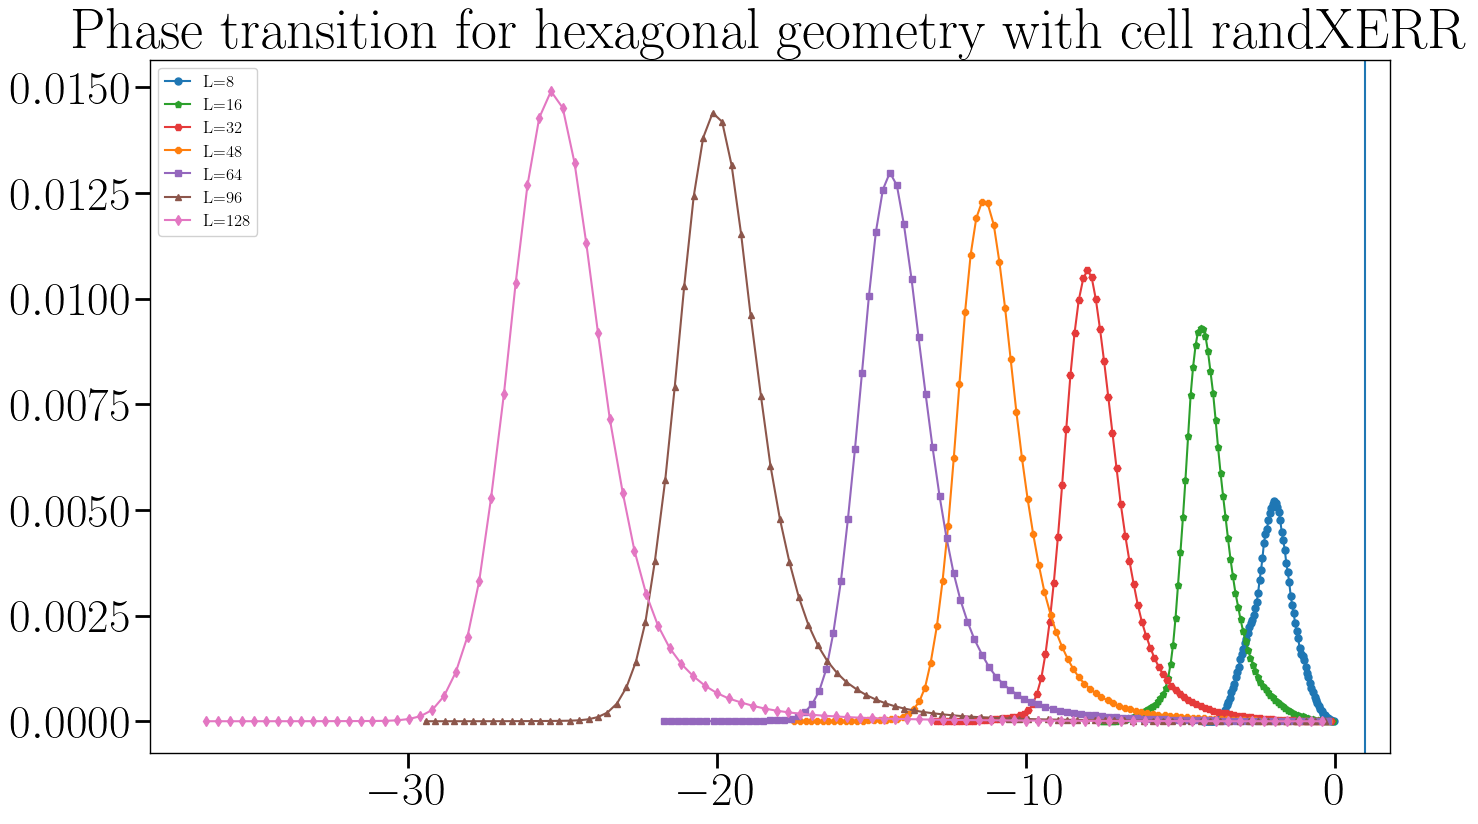

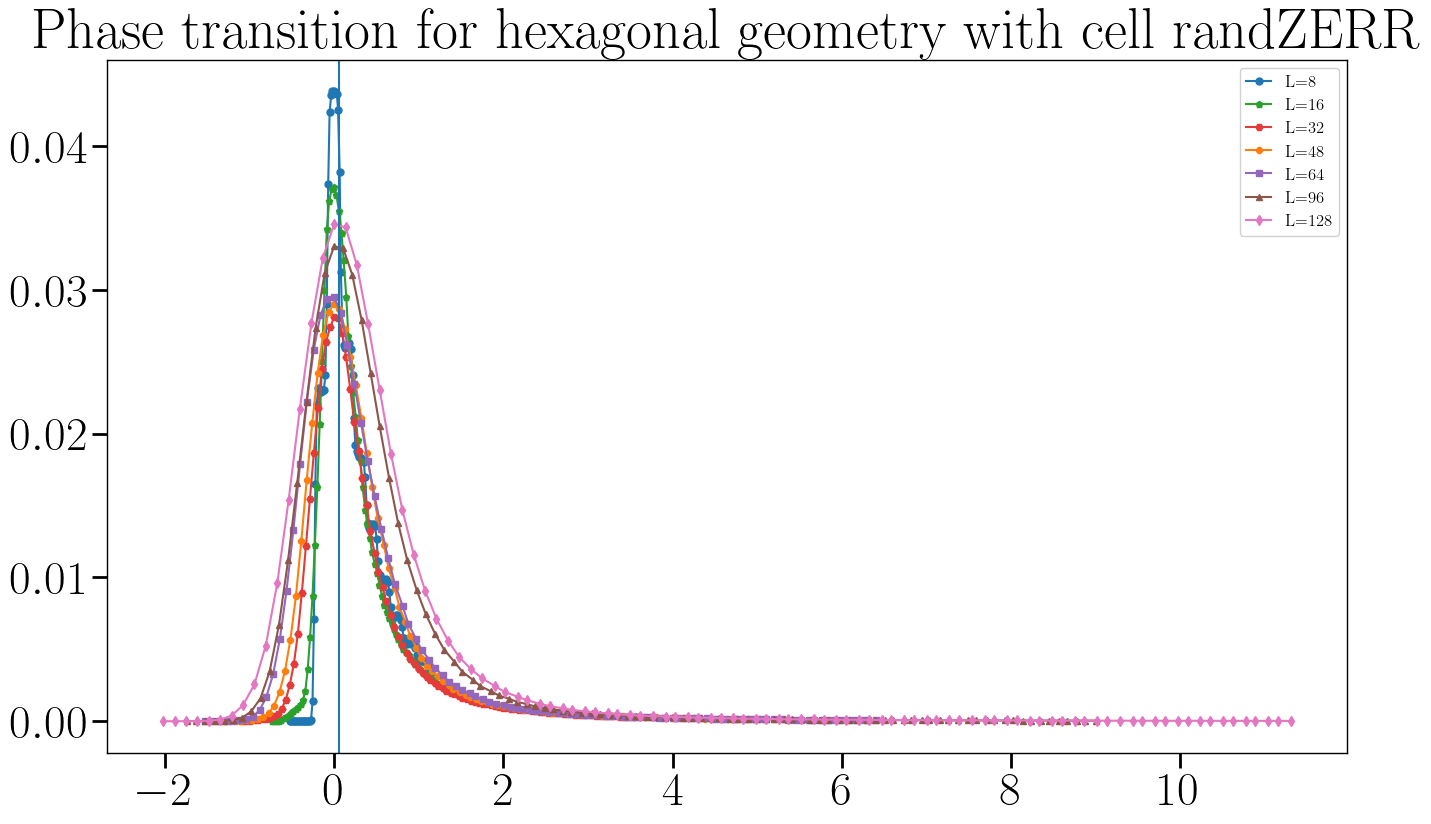

In [7]:
pc = {}
for geo,cells in geometry_cell_dict.items():
    pc[geo] = {}
    for cell in cells:
        pc[geo][cell] = []
        plt.close('all')
        plt.figure()
        plt.title(f"Phase transition for {geo} geometry with cell {cell}")
        for L in sides:
            l = Lattice2D(L, geo=geo, initNwDict=True, with_positions=False, sgpath=datpath)
            data_2d_array = np.array(read_files_to_2d_array(l.phtrapath, cell)).astype(float)
            data_2d_array = data_2d_array[np.argsort(data_2d_array[:, 0])]
            y = gaussian_filter(data_2d_array[:, 7]*l.N,sigma=1)
            pc_val = data_2d_array[np.argmax(y), 0]
            plt.plot(L**(3/4)*(data_2d_array[:, 0]-pc_val), y*L**(-129/72), label=f"L={L}")
            pc[geo][cell].append(pc_val)
        plt.axvline(x=pc_val)
        plt.legend()
        plt.show()

In [15]:
pc

{'squared': {'rand': [0.179, 0.145, 0.118, 0.106, 0.1, 0.0939, 0.0879],
  'randXERR': [0.929, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96],
  'randZERR': [0.215, 0.164, 0.118, 0.106, 0.097, 0.0879, 0.0818]},
 'triangular': {'rand': [0.23, 0.194, 0.164, 0.152, 0.142, 0.133, 0.124],
  'randXERR': [0.949, 0.96, 0.96, 0.99, 0.96, 0.99, 0.96],
  'randZERR': [0.291, 0.206, 0.164, 0.142, 0.133, 0.121, 0.115]},
 'hexagonal': {'rand': [0.17, 0.117, 0.0919, 0.0778, 0.0742, 0.0672, 0.0601],
  'randXERR': [0.899, 0.949, 0.96, 0.96, 0.96, 0.96, 0.96],
  'randZERR': [0.11, 0.0919, 0.0813, 0.0707, 0.0672, 0.0566, 0.053]}}

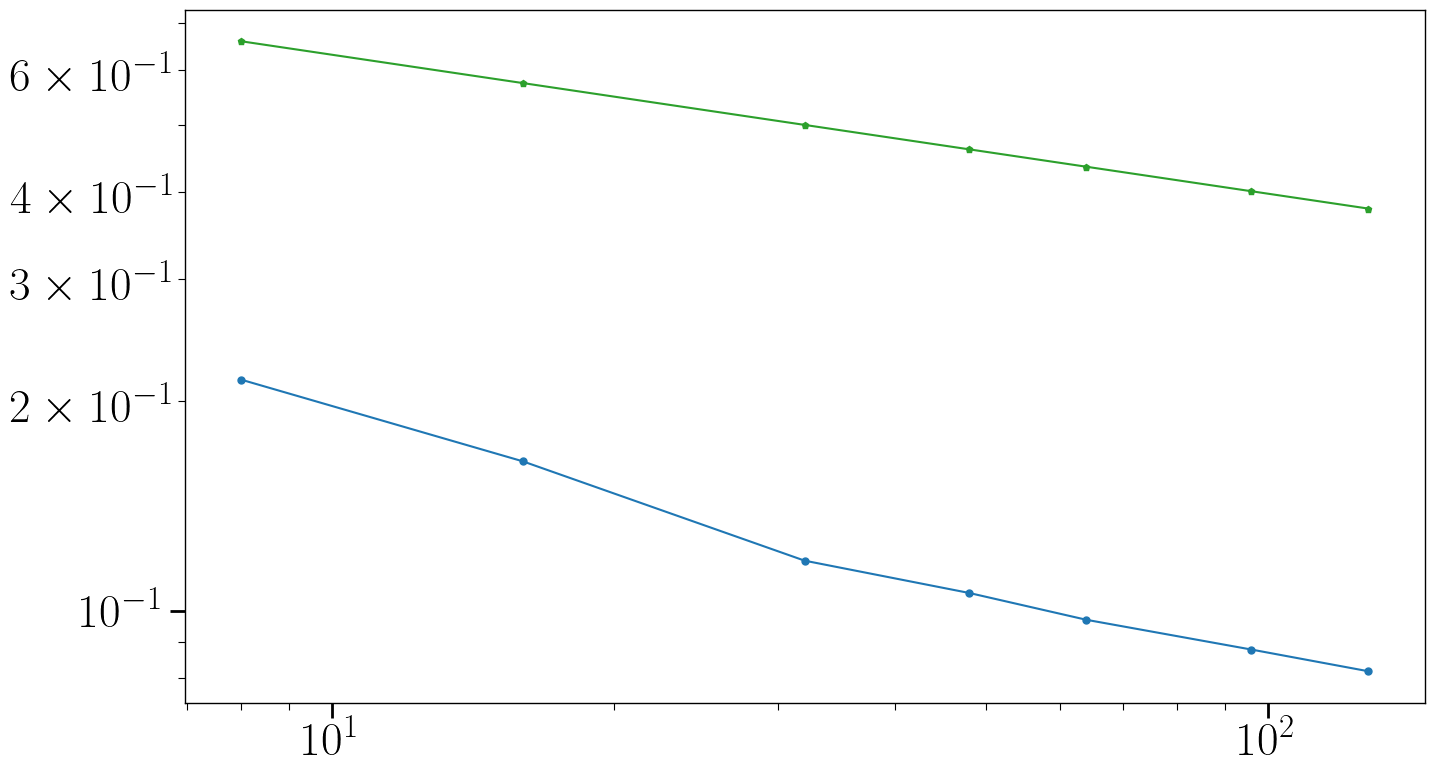

In [18]:
plt.plot(sides, [0.215, 0.164, 0.118, 0.106, 0.097, 0.0879, 0.0818])
plt.plot(sides, np.array(sides).astype(float)**(-1/5))
plt.xscale('log')
plt.yscale('log')